In [1]:
!pip install torch matplotlib pandas numpy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [3]:
import torch
from torch import nn as nn # for NN
from torch.utils.data import Dataset # class to create dataset class
from torch import optim # Optimizer
from torch.nn import functional as F # activation functions
import matplotlib.pyplot as plt # to plot a graph
import pandas as pd # py data analysis
import numpy as np

In [4]:
DEVICE = torch.device("cpu")

In [10]:
df = pd.read_csv('../Materiale/diabetes.csv')

In [12]:
class DataSet(Dataset):
    
    def __init__(self, path):
        self.dataset = pd.read_csv(path).values
        
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, i):
        return self.dataset[i, :-1], self.dataset[i, -1]

In [13]:
class Net(nn.Module):
    
    def __init__(self, n_features):
        super().__init__()
        self.n_features = n_features
        
        #Fully connected strat 1
        self.fc1 = nn.Linear(self.n_features, 16)
        self.fc2 = nn.Linear(16,32)
        self.fc3 = nn.Linear(32, 1)
        
    def forward(self, x):
        
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = F.sigmoid(self.fc3(out))
        
        return out

In [14]:
# Training loop for our network
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, test_loader, print_plot=True):
    
    #Initializing two lists to save accuracy to plot them later
    
    train_accuracy = torch.zeros(n_epochs)
    test_accuracy = torch.zeros(n_epochs)
    
    train_loss = np.zeros(n_epochs)
    test_loss = np.zeros(n_epochs)
    
    # Going thru every epoch
    for epoch in range(n_epochs):
        
        # Train
        model.train()
        total = 0
        correct = 0
        current_train_loss = 0.0
        # Going thru example, thru every batch, in our case, thru all data at once
        
        for example, labels in train_loader:
            
            # Translating calculations to gpu if is available
            example = example.to(DEVICE).float()
            labels = labels.to(DEVICE).float()
            
            # ensuring equal number of dimensions for labels and examples
            labels = labels.unsqueeze(1)
            
            # running our data thru our data - forward
            predicted = model(example)
            # Gettings loss of out network right now
            
            loss = loss_fn(predicted, labels)
            current_train_loss += loss
            
            total += labels.shape[0]
            predicted = torch.round(predicted)
            correct += (predicted == labels).sum()
            
            # Zeroing the gradient to not stack it from other iterations
            optimizer.zero_grad()
            # Running backward part of the neural network, getting gradients
            loss.backward()
            # Updating our parameters
            optimizer.step()
            
        train_accuracy[epoch] = correct / total
        train_loss[epoch] = current_train_loss / total 
        
        # Test
        
        model.eval()
        correct = 0
        total = 0
        current_test_loss = 0
        
        correct = 0
        total = 0
        
        for examples, labels in test_loader:
            examples = examples.to(device=DEVICE).float()
            labels = labels.to(device=DEVICE).float()
            
            labels = labels.unsqueeze(1)
            predicted = model(examples)
            
            loss = loss_fn(predicted, labels)
            current_test_loss += loss
            
            total += labels.shape[0]
            predicted = torch.round(predicted)
            
            correct += (predicted == labels).sum()
            
        test_accuracy[epoch] = correct / total
        test_loss[epoch] = current_test_loss / total
        
        if (epoch+1) % 10 == 0:
            print(f'Epoch: {epoch+1}',
                 f'Train Accuracy: {train_accuracy[epoch]}',
                 f'Test Accuracy: {test_accuracy[epoch]}')
            
    # If set to True, print graph of train and validation loss
    if print_plot:
        
        #Setting x-ticks
        epochs_range = range(1, n_epochs+1)
        
        # fig, ax = plt.subplots(nrows=1, ncols=2)
        plt.subplots(figsize=(10, 6))
        
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, train_loss, 'g', label='Training loss')
        plt.plot(epochs_range, test_loss, 'b', label='Test loss')
        plt.title('Training and Test Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # #Ploting both curves, train and val 
        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, train_accuracy, 'g', label='Training accuracy')
        plt.plot(epochs_range, test_accuracy, 'b', label='Test accuracy')
        plt.title('Training and Test Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

In [15]:
data = DataSet(r'../Materiale/diabetes.csv')

In [16]:
n_samples = len(data)

n_test = int(n_samples*0.2)

train_set, test_set = torch.utils.data.random_split(data, [n_samples-n_test, n_test])
train_loader = torch.utils.data.DataLoader(train_set, 
                                           batch_size = len(train_set), shuffle = True)


test_loader = torch.utils.data.DataLoader(test_set, batch_size = len(test_set), 
                                         shuffle = False)

/home/auritarius/.local/lib/python3.10/site-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 10 Train Accuracy: 0.6780487895011902 Test Accuracy: 0.6535947918891907
Epoch: 20 Train Accuracy: 0.7186991572380066 Test Accuracy: 0.673202633857727
Epoch: 30 Train Accuracy: 0.7398374080657959 Test Accuracy: 0.6797385811805725
Epoch: 40 Train Accuracy: 0.7349593639373779 Test Accuracy: 0.686274528503418
Epoch: 50 Train Accuracy: 0.7560975551605225 Test Accuracy: 0.673202633857727
Epoch: 60 Train Accuracy: 0.7609755992889404 Test Accuracy: 0.6797385811805725
Epoch: 70 Train Accuracy: 0.7544715404510498 Test Accuracy: 0.6666666865348816
Epoch: 80 Train Accuracy: 0.7691056728363037 Test Accuracy: 0.6797385811805725
Epoch: 90 Train Accuracy: 0.7707316875457764 Test Accuracy: 0.6797385811805725
Epoch: 100 Train Accuracy: 0.7886179089546204 Test Accuracy: 0.6993464231491089
Epoch: 110 Train Accuracy: 0.7788617610931396 Test Accuracy: 0.6993464231491089
Epoch: 120 Train Accuracy: 0.7918699383735657 Test Accuracy: 0.7124183177947998
Epoch: 130 Train Accuracy: 0.7967479825019836 Test A

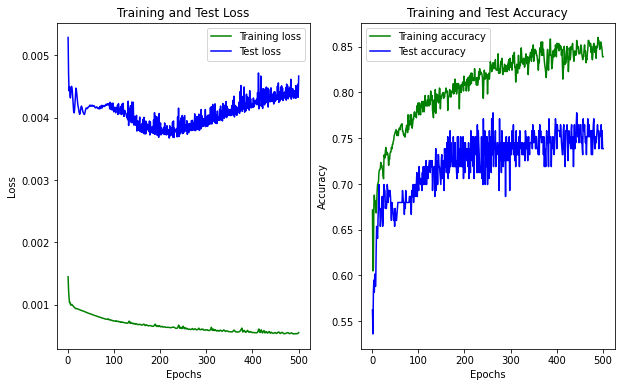

In [17]:
learning_rate = 0.01

model = Net(len(data[0][0])).to(DEVICE)

optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.BCELoss()

training_loop(
    n_epochs=500,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    print_plot=True,
    train_loader=train_loader,
    test_loader=test_loader
)